In [1]:
%load_ext uhed


In [2]:
%slice Syed

In [3]:
%site vts-gpo

In [4]:
%lab

<IPython.core.display.Javascript object>

I created a slicename, selected the site that was not heavily in use by other people in class and manifested

In [8]:
manifest = SITE.listresources(context, SLICE)

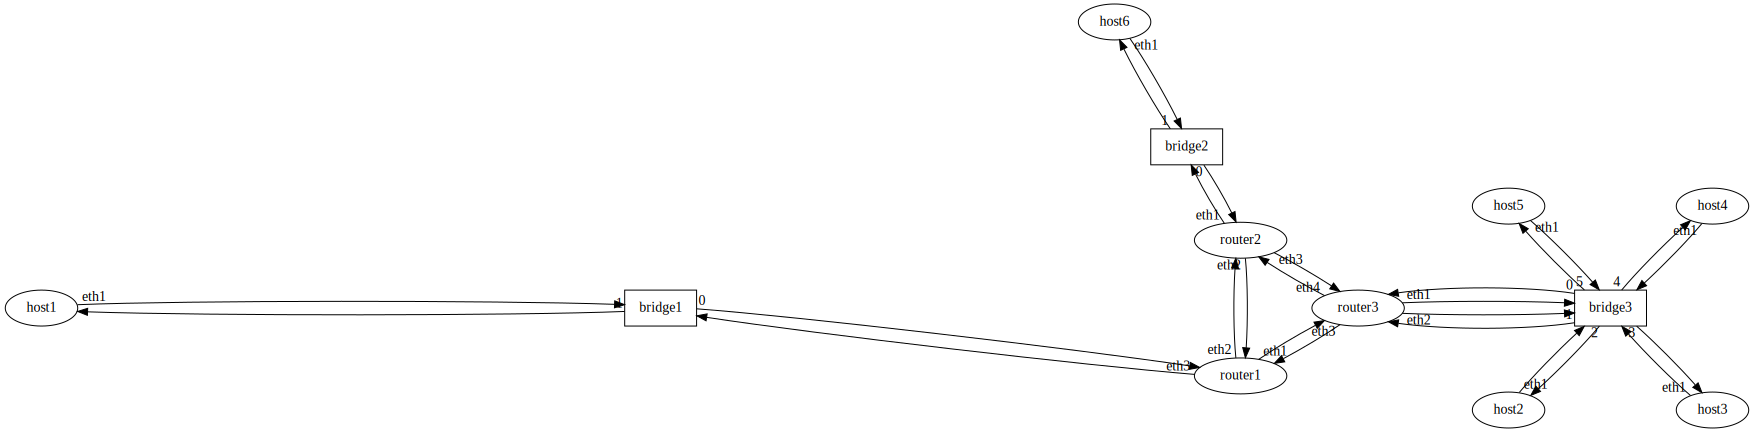

In [13]:
genish.showtopo(manifest)

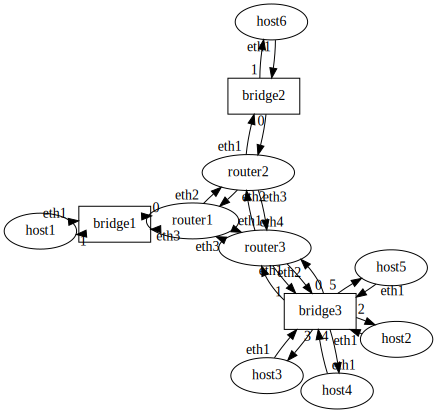

In [14]:
genish.showtopo(manifest,"neato")

In [17]:
SITE.getL2Table(context, SLICE, "bridge3")

Port,VLAN,MAC,Age
1,1360,be:36:2c:f5:36:84,7
2,3810,0a:7d:60:9d:c4:60,7


In [18]:
SITE.getL2Table(context, SLICE, "bridge2")

Port,VLAN,MAC,Age
1,0,b2:b0:89:c5:03:07,9


In [19]:
SITE.getL2Table(context, SLICE, "bridge1")

Port,VLAN,MAC,Age


At this point essentially what I did was I created the L2 tables and assigned them to the bridges present in the network. This shows that everything is working fine (MAC address).

In [23]:
SITE.IPv4Router.getRouteTable(context, SLICE, "router1")

,Selected,Network,Next Hop,Interface,Duration
O,True,10.20.127.0/24 [110/20],10.75.88.2,eth2,00:19:18
O,True,10.30.155.0/24 [110/20],10.77.7.2,eth1,00:19:18
O,True,10.40.81.0/24 [110/20],10.77.7.2,eth1,00:19:18
O,False,10.75.88.0/30 [110/10],directly connected,eth2,00:20:09
C,True,10.75.88.0/30,directly connected,eth2,None
O,True,10.76.100.0/30 [110/20],10.75.88.2,eth2,00:19:18
,False,,10.77.7.2,eth1,00:19:18
O,False,10.77.7.0/30 [110/10],directly connected,eth1,00:19:28
C,True,10.77.7.0/30,directly connected,eth1,None
C,True,127.0.0.0/8,directly connected,lo,None


In [24]:
SITE.IPv4Router.getRouteTable(context, SLICE, "router2")

,Selected,Network,Next Hop,Interface,Duration
O,False,10.20.127.0/24 [110/10],directly connected,eth1,00:20:14
C,True,10.20.127.0/24,directly connected,eth1,None
O,True,10.30.155.0/24 [110/20],10.76.100.2,eth3,00:19:29
O,True,10.40.81.0/24 [110/20],10.76.100.2,eth3,00:19:29
O,False,10.75.88.0/30 [110/10],directly connected,eth2,00:19:29
C,True,10.75.88.0/30,directly connected,eth2,None
O,False,10.76.100.0/30 [110/10],directly connected,eth3,00:19:33
C,True,10.76.100.0/30,directly connected,eth3,None
O,True,10.77.7.0/30 [110/20],10.75.88.1,eth2,00:19:23
,False,,10.76.100.2,eth3,00:19:23


In [25]:
SITE.IPv4Router.getRouteTable(context, SLICE, "router3")

,Selected,Network,Next Hop,Interface,Duration
O,True,10.20.127.0/24 [110/20],10.76.100.1,eth4,00:19:36
O,False,10.30.155.0/24 [110/10],directly connected,eth2,00:20:20
C,True,10.30.155.0/24,directly connected,eth2,None
O,False,10.40.81.0/24 [110/10],directly connected,eth1,00:20:20
C,True,10.40.81.0/24,directly connected,eth1,None
O,True,10.75.88.0/30 [110/20],10.76.100.1,eth4,00:19:36
,False,,10.77.7.1,eth3,00:19:36
O,False,10.76.100.0/30 [110/10],directly connected,eth4,00:20:20
C,True,10.76.100.0/30,directly connected,eth4,None
O,False,10.77.7.0/30 [110/10],directly connected,eth3,00:20:20


In [27]:
SITE.Host.getRouteTable(context, SLICE, "host1")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.10.113.254,eth1
10.10.113.0,255.255.255.0,0.0.0.0,eth1


In [28]:
SITE.Host.getRouteTable(context, SLICE, "host2")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.30.155.254,eth1
10.30.155.0,255.255.255.0,0.0.0.0,eth1


In [29]:
SITE.Host.getRouteTable(context, SLICE, "host3")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.30.155.175,eth1
10.30.155.0,255.255.255.0,0.0.0.0,eth1


In [30]:
SITE.Host.getRouteTable(context, SLICE, "host4")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.40.81.254,eth1
10.40.81.0,255.255.255.0,0.0.0.0,eth1


In [31]:
SITE.Host.getRouteTable(context, SLICE, "host5")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.40.81.254,eth1
10.40.81.0,255.255.255.0,0.0.0.0,eth1


In [32]:
SITE.Host.getRouteTable(context, SLICE, "host6")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.20.127.254,eth1
10.20.127.0,255.255.255.0,0.0.0.0,eth1


In [35]:
stpData = SITE.getSTPInfo(context, SLICE, ["bridge1", "bridge2", "bridge3"])


In [36]:
stpData["bridge1"]


<STPProxy at 0x7fcee6b25680 for dict at 0x7fcee6b3fc58>

In [37]:
stpData["bridge2"]


<STPProxy at 0x7fcee6b216c8 for dict at 0x7fcee6b2bd70>

In [43]:
stpData["bridge3"]


<STPProxy at 0x7fcee66a4200 for dict at 0x7fcee664d7f8>

In [46]:
SITE.getPortInfo(context, SLICE, "bridge1")

Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge1:0,8527,None,1500,up,down,834 (11),1948 (33)
bridge1:1,8541,None,1500,up,up,648 (8),2143442 (41215)


In [47]:
SITE.getPortInfo(context, SLICE, "bridge2")

Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge2:0,8529,None,1500,up,up,646080 (8284),2143412 (41215)
bridge2:1,8551,None,1500,up,up,648 (8),2788636 (49487)


In [48]:
SITE.getPortInfo(context, SLICE, "bridge3")

Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge3:5,8549,1360,1500,up,up,648 (8),2788792 (49490)
bridge3:2,8543,3810,1500,up,up,648 (8),2788896 (49492)
bridge3:3,8545,3810,1500,up,up,648 (8),2788844 (49491)
bridge3:4,8547,2965,1500,up,up,648 (8),2143412 (41215)
bridge3:0,8535,3810,1500,up,up,646080 (8284),2143516 (41217)
bridge3:1,8533,1360,1500,up,up,646080 (8284),2143568 (41218)



I recieved a Hello message from the following IP Address 10.30.155.254

tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
00:27:39.258314 0a:7d:60:9d:c4:60 (oui Unknown) > 01:00:5e:00:00:05 (oui Unknown), ethertype IPv4 (0x0800), length 78: 10.30.155.254 > 224.0.0.5
: OSPFv2, Hello, length 44

Error 2 - If you ping from host 1 to host 2 you get a host unreachable error. 

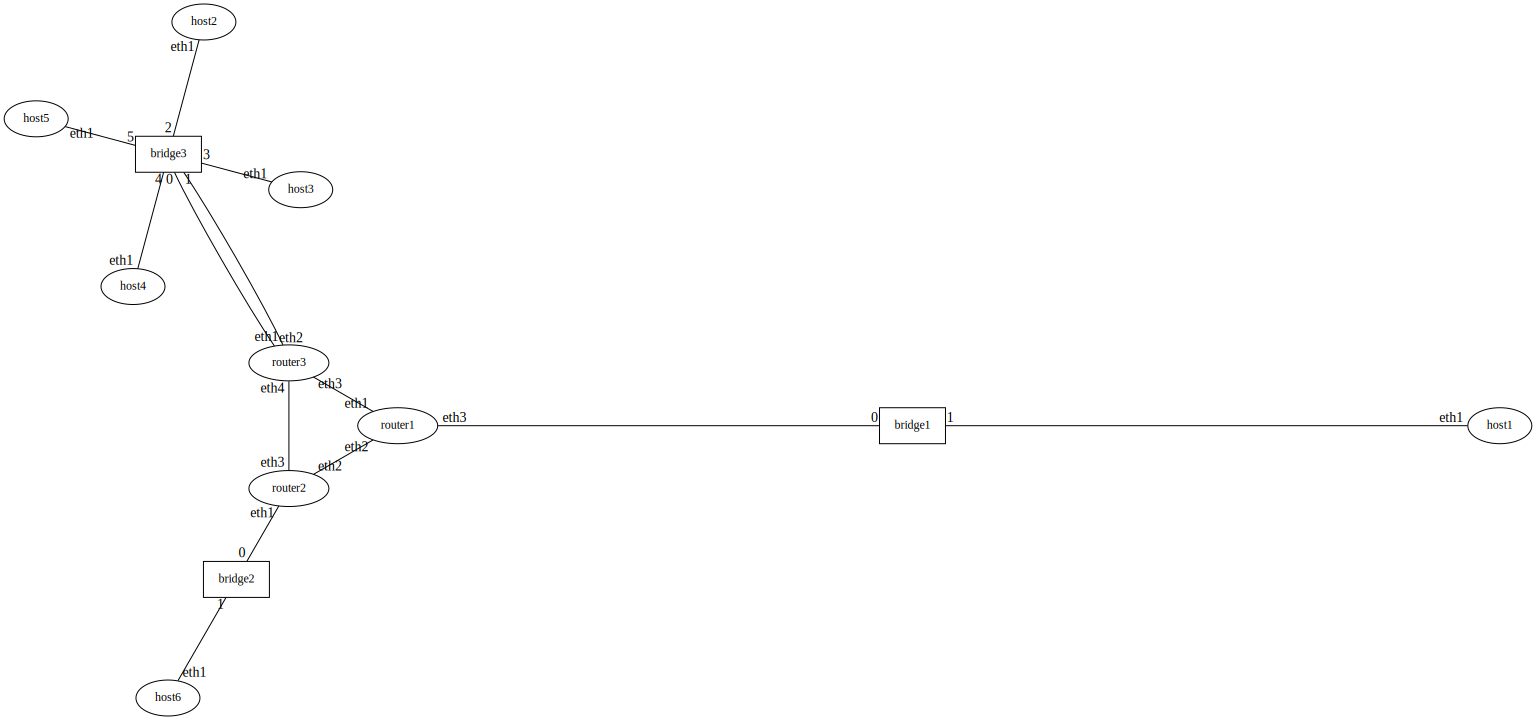

In [50]:
import uhgeni.graph.util

g = uhgeni.graph.util.buildFromManifest(manifest)
g.context = context

g.show()


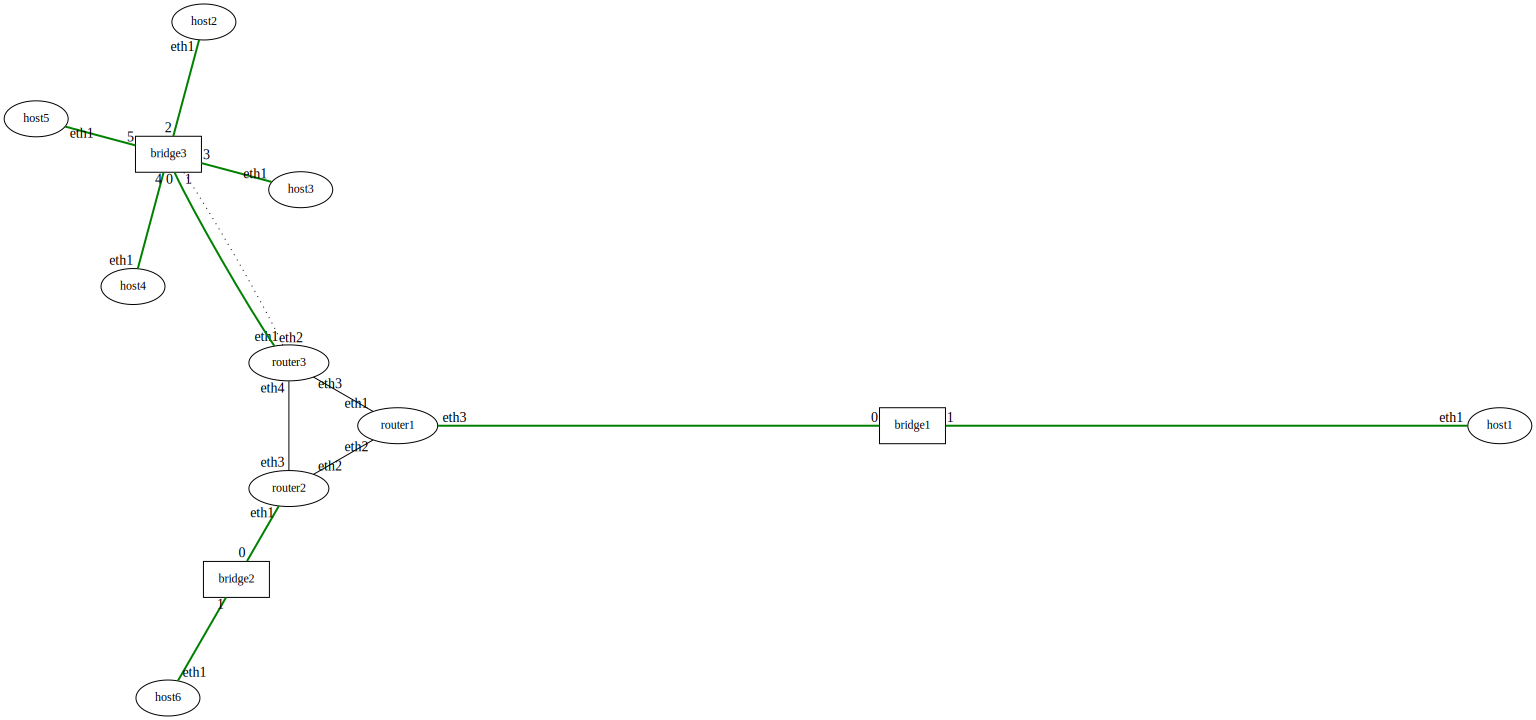

In [51]:
g["bridge3"][1].setDown()
g.decorateSTPInfo()
g.show()


# Error 1- # Host1 can not connect to any of the hosts because it is broken the "Link state" even says "down" indicating a broken connection
Client ID	ifindex	vlan	MTU	Admin State	Link State	RX Bytes (Pkts)	TX Bytes (Pkts)
bridge1:0	8527	None	1500	up	down	834 (11)	1948 (33)

# Error 2 - host 4 can't talk to any other hosts present in the topology simply because it is in a Vlan that doesn't have access other than the bridge its connected to and bridge 3 port 1 & 0 both belong to Vlan. Bridge 3's port 1 is (1360) and port 0 is (3810) therefore it is unable to communicate with any of the hosts.



sazaidi5@cot-cn:~$ gssh Syed host1

/ #
/ # ipaddr
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN qlen 1
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host
       valid_lft forever preferred_lft forever
8542: eth1@if8541: <BROADCAST,MULTICAST,UP,LOWER_UP,M-DOWN> mtu 1500 qdisc netem state UP qlen 1000
    link/ether e6:da:69:c5:fe:be brd ff:ff:ff:ff:ff:ff
    inet 10.10.113.192/24 scope global eth1
       valid_lft forever preferred_lft forever
    inet6 fe80::e4da:69ff:fec5:febe/64 scope link
       valid_lft forever preferred_lft forever
/ # route -n
Kernel IP routing table
Destination     Gateway         Genmask         Flags Metric Ref    Use Iface
0.0.0.0         10.10.113.254   0.0.0.0         UG    0      0        0 eth1
10.10.113.0     0.0.0.0         255.255.255.0   U     0      0        0 eth1
/ #
/ #
/ # arp -a
/ # ping 127.0.0.1
PING 127.0.0.1 (127.0.0.1) 56(84) bytes of data.
64 bytes from 127.0.0.1: icmp_seq=1 ttl=64 time=0.056 ms
64 bytes from 127.0.0.1: icmp_seq=2 ttl=64 time=0.060 ms
64 bytes from 127.0.0.1: icmp_seq=3 ttl=64 time=0.050 ms
64 bytes from 127.0.0.1: icmp_seq=4 ttl=64 time=0.041 ms
^C
--- 127.0.0.1 ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 2999ms
rtt min/avg/max/mdev = 0.041/0.051/0.060/0.011 ms
/ #





4 packets transmitted, 0 received, +4 errors, 100% packet loss, time 2999ms

/ #
/ #
/ # ping 10.20.127.17
PING 10.20.127.17 (10.20.127.17) 56(84) bytes of data.
64 bytes from 10.20.127.17: icmp_seq=1 ttl=62 time=2.20 ms
64 bytes from 10.20.127.17: icmp_seq=2 ttl=62 time=0.134 ms
64 bytes from 10.20.127.17: icmp_seq=3 ttl=62 time=0.110 ms
64 bytes from 10.20.127.17: icmp_seq=4 ttl=62 time=0.106 ms
64 bytes from 10.20.127.17: icmp_seq=5 ttl=62 time=0.101 ms
64 bytes from 10.20.127.17: icmp_seq=6 ttl=62 time=0.237 ms
^C
--- 10.20.127.17 ping statistics ---
6 packets transmitted, 6 received, 0% packet loss, time 4997ms
rtt min/avg/max/mdev = 0.101/0.481/2.200/0.770 ms
/ #
/ #
/ # ipaddr
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN qlen 1
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host
       valid_lft forever preferred_lft forever
8544: eth1@if8543: <BROADCAST,MULTICAST,UP,LOWER_UP,M-DOWN> mtu 1500 qdisc netem state UP qlen 1000
    link/ether d2:86:7f:32:e0:2d brd ff:ff:ff:ff:ff:ff
    inet 10.30.155.113/24 scope global eth1
       valid_lft forever preferred_lft forever
    inet6 fe80::d086:7fff:fe32:e02d/64 scope link
       valid_lft forever preferred_lft forever
/ #
/ #
/ # ping 10.20.127.17
PING 10.20.127.17 (10.20.127.17) 56(84) bytes of data.
64 bytes from 10.20.127.17: icmp_seq=1 ttl=62 time=1.01 ms
64 bytes from 10.20.127.17: icmp_seq=2 ttl=62 time=0.117 ms
64 bytes from 10.20.127.17: icmp_seq=3 ttl=62 time=0.115 ms
64 bytes from 10.20.127.17: icmp_seq=4 ttl=62 time=0.309 ms
^C
--- 10.20.127.17 ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 2999ms
rtt min/avg/max/mdev = 0.115/0.389/1.017/0.371 ms
/ #

/ #
/ # ipaddr
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN qlen 1
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host
       valid_lft forever preferred_lft forever
8546: eth1@if8545: <BROADCAST,MULTICAST,UP,LOWER_UP,M-DOWN> mtu 1500 qdisc netem state UP qlen 1000
    link/ether 52:49:60:7c:81:ba brd ff:ff:ff:ff:ff:ff
    inet 10.30.155.187/24 scope global eth1
       valid_lft forever preferred_lft forever
    inet6 fe80::5049:60ff:fe7c:81ba/64 scope link
       valid_lft forever preferred_lft forever
/ #
/ #
/ # route -n
Kernel IP routing table
Destination     Gateway         Genmask         Flags Metric Ref    Use Iface
0.0.0.0         10.30.155.175   0.0.0.0         UG    0      0        0 eth1
10.30.155.0     0.0.0.0         255.255.255.0   U     0      0        0 eth1
/ #
/ #
/ # arp -a
/ # ping 10.10.113.192
PING 10.10.113.192 (10.10.113.192) 56(84) bytes of data.
From 10.30.155.187 icmp_seq=1 Destination Host Unreachable
From 10.30.155.187 icmp_seq=2 Destination Host Unreachable
From 10.30.155.187 icmp_seq=3 Destination Host Unreachable
^C
--- 10.10.113.192 ping statistics ---
5 packets transmitted, 0 received, +3 errors, 100% packet loss, time 4024ms
pipe 3
/ #
/ #
/ # ping 10.20.127.17
PING 10.20.127.17 (10.20.127.17) 56(84) bytes of data.
From 10.30.155.187 icmp_seq=1 Destination Host Unreachable
From 10.30.155.187 icmp_seq=2 Destination Host Unreachable
From 10.30.155.187 icmp_seq=3 Destination Host Unreachable
^C
--- 10.20.127.17 ping statistics ---
5 packets transmitted, 0 received, +3 errors, 100% packet loss, time 3999ms
pipe 4
/ #

/ # ip addr
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN qlen 1
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host
       valid_lft forever preferred_lft forever
8548: eth1@if8547: <BROADCAST,MULTICAST,UP,LOWER_UP,M-DOWN> mtu 1500 qdisc netem state UP qlen 1000
    link/ether 16:e0:25:71:61:2c brd ff:ff:ff:ff:ff:ff
    inet 10.40.81.89/24 scope global eth1
       valid_lft forever preferred_lft forever
    inet6 fe80::14e0:25ff:fe71:612c/64 scope link
       valid_lft forever preferred_lft forever
/ #
/ # route -n
Kernel IP routing table
Destination     Gateway         Genmask         Flags Metric Ref    Use Iface
0.0.0.0         10.40.81.254    0.0.0.0         UG    0      0        0 eth1
10.40.81.0      0.0.0.0         255.255.255.0   U     0      0        0 eth1
/ #
/ #
/ # arp -a
/ # ping 10.10.113.192
PING 10.10.113.192 (10.10.113.192) 56(84) bytes of data.
From 10.40.81.89 icmp_seq=1 Destination Host Unreachable
From 10.40.81.89 icmp_seq=2 Destination Host Unreachable
From 10.40.81.89 icmp_seq=3 Destination Host Unreachable
^C
--- 10.10.113.192 ping statistics ---
5 packets transmitted, 0 received, +3 errors, 100% packet loss, time 4024ms
pipe 3
/ #
/ #
/ # ping 10.20.127.17
PING 10.20.127.17 (10.20.127.17) 56(84) bytes of data.
From 10.40.81.89 icmp_seq=1 Destination Host Unreachable
From 10.40.81.89 icmp_seq=2 Destination Host Unreachable
From 10.40.81.89 icmp_seq=3 Destination Host Unreachable
^C
--- 10.20.127.17 ping statistics ---
6 packets transmitted, 0 received, +3 errors, 100% packet loss, time 5031ms

    inet6 fe80::8834:d5ff:fe9b:8200/64 scope link
       valid_lft forever preferred_lft forever
/ #
/ #
/ # route -n
Kernel IP routing table
Destination     Gateway         Genmask         Flags Metric Ref    Use Iface
0.0.0.0         10.40.81.254    0.0.0.0         UG    0      0        0 eth1
10.40.81.0      0.0.0.0         255.255.255.0   U     0      0        0 eth1
/ #
/ #
/ # arp -a
/ #
/ # ping 10.10.113.192
PING 10.10.113.192 (10.10.113.192) 56(84) bytes of data.
From 10.40.81.254 icmp_seq=1 Destination Net Unreachable
From 10.40.81.254 icmp_seq=2 Destination Net Unreachable
^C
--- 10.10.113.192 ping statistics ---
2 packets transmitted, 0 received, +2 errors, 100% packet loss, time 1001ms

/ #
/ #
/ # ping 10.20.127.17
PING 10.20.127.17 (10.20.127.17) 56(84) bytes of data.
From 10.40.81.244 icmp_seq=1 Destination Host Unreachable
From 10.40.81.244 icmp_seq=2 Destination Host Unreachable
From 10.40.81.244 icmp_seq=3 Destination Host Unreachable
^C
--- 10.20.127.17 ping statistics ---
6 packets transmitted, 0 received, +3 errors, 100% packet loss, time 5025ms
pipe 3
/ #
/ #
/ #
/ # ping 10.20.127.17
PING 10.20.127.17 (10.20.127.17) 56(84) bytes of data.
From 10.40.81.244 icmp_seq=1 Destination Host Unreachable
From 10.40.81.244 icmp_seq=2 Destination Host Unreachable
From 10.40.81.244 icmp_seq=3 Destination Host Unreachable
^C
--- 10.20.127.17 ping statistics ---
5 packets transmitted, 0 received, +3 errors, 100% packet loss, time 3999ms
pipe 4

    inet6 fe80::8834:d5ff:fe9b:8200/64 scope link
       valid_lft forever preferred_lft forever
/ #
/ #
/ # route -n
Kernel IP routing table
Destination     Gateway         Genmask         Flags Metric Ref    Use Iface
0.0.0.0         10.40.81.254    0.0.0.0         UG    0      0        0 eth1
10.40.81.0      0.0.0.0         255.255.255.0   U     0      0        0 eth1
/ #
/ #
/ # arp -a
/ #
/ # ping 10.10.113.192
PING 10.10.113.192 (10.10.113.192) 56(84) bytes of data.
From 10.40.81.254 icmp_seq=1 Destination Net Unreachable
From 10.40.81.254 icmp_seq=2 Destination Net Unreachable
^C
--- 10.10.113.192 ping statistics ---
2 packets transmitted, 0 received, +2 errors, 100% packet loss, time 1001ms

/ #
/ #
/ # ping 10.20.127.17
PING 10.20.127.17 (10.20.127.17) 56(84) bytes of data.
From 10.40.81.244 icmp_seq=1 Destination Host Unreachable
From 10.40.81.244 icmp_seq=2 Destination Host Unreachable
From 10.40.81.244 icmp_seq=3 Destination Host Unreachable
^C
--- 10.20.127.17 ping statistics ---
6 packets transmitted, 0 received, +3 errors, 100% packet loss, time 5025ms
pipe 3
/ #
/ #
/ #
/ # ping 10.20.127.17
PING 10.20.127.17 (10.20.127.17) 56(84) bytes of data.
From 10.40.81.244 icmp_seq=1 Destination Host Unreachable
From 10.40.81.244 icmp_seq=2 Destination Host Unreachable
From 10.40.81.244 icmp_seq=3 Destination Host Unreachable
^C
--- 10.20.127.17 ping statistics ---
5 packets transmitted, 0 received, +3 errors, 100% packet loss, time 3999ms
pipe 4

sazaidi5@cot-cn:~$ gssh Syed host6
/ # ip addr
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN qlen 1
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host
       valid_lft forever preferred_lft forever
8552: eth1@if8551: <BROADCAST,MULTICAST,UP,LOWER_UP,M-DOWN> mtu 1500 qdisc netem state UP qlen 1000
    link/ether 96:86:c3:a1:89:4e brd ff:ff:ff:ff:ff:ff
    inet 10.20.127.17/24 scope global eth1
       valid_lft forever preferred_lft forever
    inet6 fe80::9486:c3ff:fea1:894e/64 scope link
       valid_lft forever preferred_lft forever
/ #
/ # route-n
/bin/sh: route-n: not found
/ #
/ #
/ # route -n
Kernel IP routing table
Destination     Gateway         Genmask         Flags Metric Ref    Use Iface
0.0.0.0         10.20.127.254   0.0.0.0         UG    0      0        0 eth1
10.20.127.0     0.0.0.0         255.255.255.0   U     0      0        0 eth1
/ #
/ #
/ # arp -a
/ # ping 10.10.113.192
PING 10.10.113.192 (10.10.113.192) 56(84) bytes of data.
From 10.20.127.254 icmp_seq=1 Destination Net Unreachable
From 10.20.127.254 icmp_seq=2 Destination Net Unreachable
From 10.20.127.254 icmp_seq=3 Destination Net Unreachable
^C
--- 10.10.113.192 ping statistics ---
3 packets transmitted, 0 received, +3 errors, 100% packet loss, time 2000ms

/ #


# Error 3 is - essentially h3 & h2 inability to reach/communicate with host 5 & 4 is what the error is and thats caused due incompatibility between the different VLANs in this topology furthermore host 5 & 2 also have this same problem

 Did a traceroute on h2 and copied and pasted the ip address from h6 in host2 and got the following result
 
 # traceroute -n 10.20.127.17
traceroute to 10.20.127.17 (10.20.127.17), 30 hops max, 46 byte packets
 1  10.30.155.254  0.694 ms  0.004 ms  0.004 ms
 2  10.76.100.1  0.004 ms  0.003 ms  0.003 ms
 3  10.20.127.17  0.587 ms  0.005 ms  0.003 ms

hop 3 is the destination, hop 2 is the bridge

traceroute to 10.20.127.17 (10.20.127.17), 30 hops max, 46 byte packets
 1  10.30.155.254  0.694 ms  0.004 ms  0.004 ms
 2  10.76.100.1  0.004 ms  0.003 ms  0.003 ms
 3  10.20.127.17  0.587 ms  0.005 ms  0.003 ms
/ #


Traceroute on h2 from h5 ip address

/ # traceroute -n 10.40.81.244
traceroute to 10.40.81.244 (10.40.81.244), 30 hops max, 46 byte packets
 1  10.30.155.254  0.619 ms  0.004 ms  0.004 ms
 2  10.30.155.254  2998.170 ms !H  2999.934 ms !H  2999.975 ms !H

# Last error - Theres a delay in the round trip time or the ping games from H2 to H5 compared to other hosts H2 to H6 and we can fix that or decrease the time for the round trip by rearranging the topology and the VLANS

In [53]:
SITE.IPv4Router.getOSPFNeighbors(context, SLICE, "router1")


ID,Priority,State,Dead Time,Address,Interface
10.76.100.1,1,Full/Backup,36.972s,10.75.88.2,eth2:10.75.88.1
10.77.7.2,1,Full/DR,39.530s,10.77.7.2,eth1:10.77.7.1


In [54]:
SITE.IPv4Router.getOSPFNeighbors(context, SLICE, "router2")


ID,Priority,State,Dead Time,Address,Interface
10.77.7.1,1,Full/DR,31.701s,10.75.88.1,eth2:10.75.88.2
10.77.7.2,1,Full/DR,34.258s,10.76.100.2,eth3:10.76.100.1


In [55]:
SITE.IPv4Router.getOSPFNeighbors(context, SLICE, "router3")


ID,Priority,State,Dead Time,Address,Interface
10.76.100.1,1,Full/Backup,34.859s,10.76.100.1,eth4:10.76.100.2
10.77.7.1,1,Full/Backup,34.859s,10.77.7.1,eth3:10.77.7.2


# Solution 1 - For host 1 to be able to communicate with all the hosts we must change the link state to "up"

# Solution to Error 2 is - Either there must be a port assigned to bridge 3 that goes from the router to the bridge 3 and/or port 1 & 0 must be inclusive to all Vlans specially host 4. 

# Solution to the Error 3 - Modify the configuration of H4 to bridge all VLANs 